In [1]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [4]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [5]:
train_data = np.array(train_data)
np.random.shuffle(train_data)
models = np.array_split(train_data, 10)
train_x=[]
train_y=[]
for model_num in range(10):
    train_x.append(models[model_num][:, 0])
    train_y.append(models[model_num][:, 1])
train_x =np.array(train_x)
train_y=np.array(train_y)
bias=[]
vari=[]
err=[]
ierr=[]

In [6]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [7]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        err.append(np.mean(err_mean))
        ierr.append(np.mean(err_mean-(mean_point_over_10 - test_y)**2-var_point_over_10))
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias": bias,"Bias Square": np.array(bias)**2 ,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [8]:
table = bias_var()

 Degree        Bias   Bias Square       Variance  Mean Squared Error  Irreducible Error
      1  231.596122  53636.763913   25521.737964        1.029344e+06       3.938112e-11
      2  225.387935  50799.721134   47599.196912        1.002330e+06       5.661605e-11
      3  -18.936343    358.585104   63089.163036        7.233336e+04       7.412382e-12
      4  -15.957939    254.655829   76973.646246        8.570199e+04      -1.464286e-11
      5  -15.044106    226.325130   96901.253751        1.051034e+05      -3.365130e-12
      6  -14.764173    217.980794  105275.523721        1.122534e+05       4.547474e-13
      7  -12.757957    162.765465  129144.912077        1.376637e+05       5.638867e-12
      8  -19.858054    394.342322  133546.811409        1.423920e+05       1.627996e-11
      9  -17.590045    309.409666  161856.056399        1.704605e+05       4.820322e-12
     10  -20.444545    417.979424  186110.479423        1.967905e+05       2.455636e-11
     11  -21.624160    467.60430

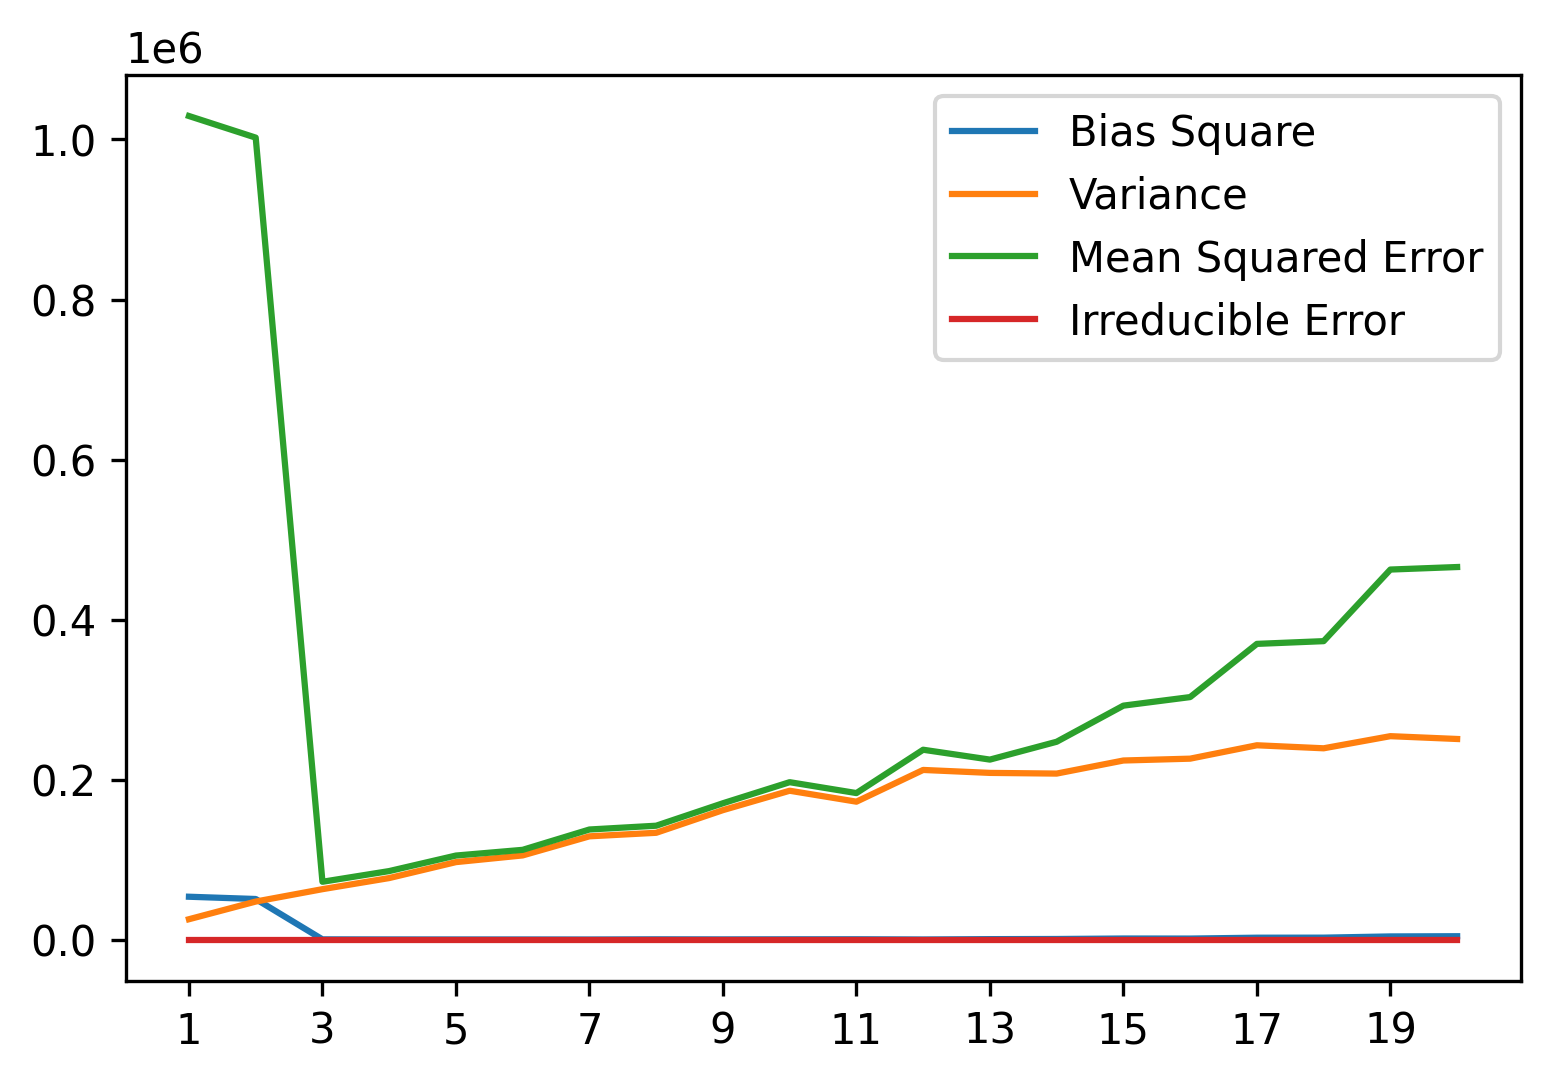

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.plot(np.array(range(1,21)),table["Irreducible Error"].tolist(), label="Irreducible Error")
plt.legend()
plt.show()

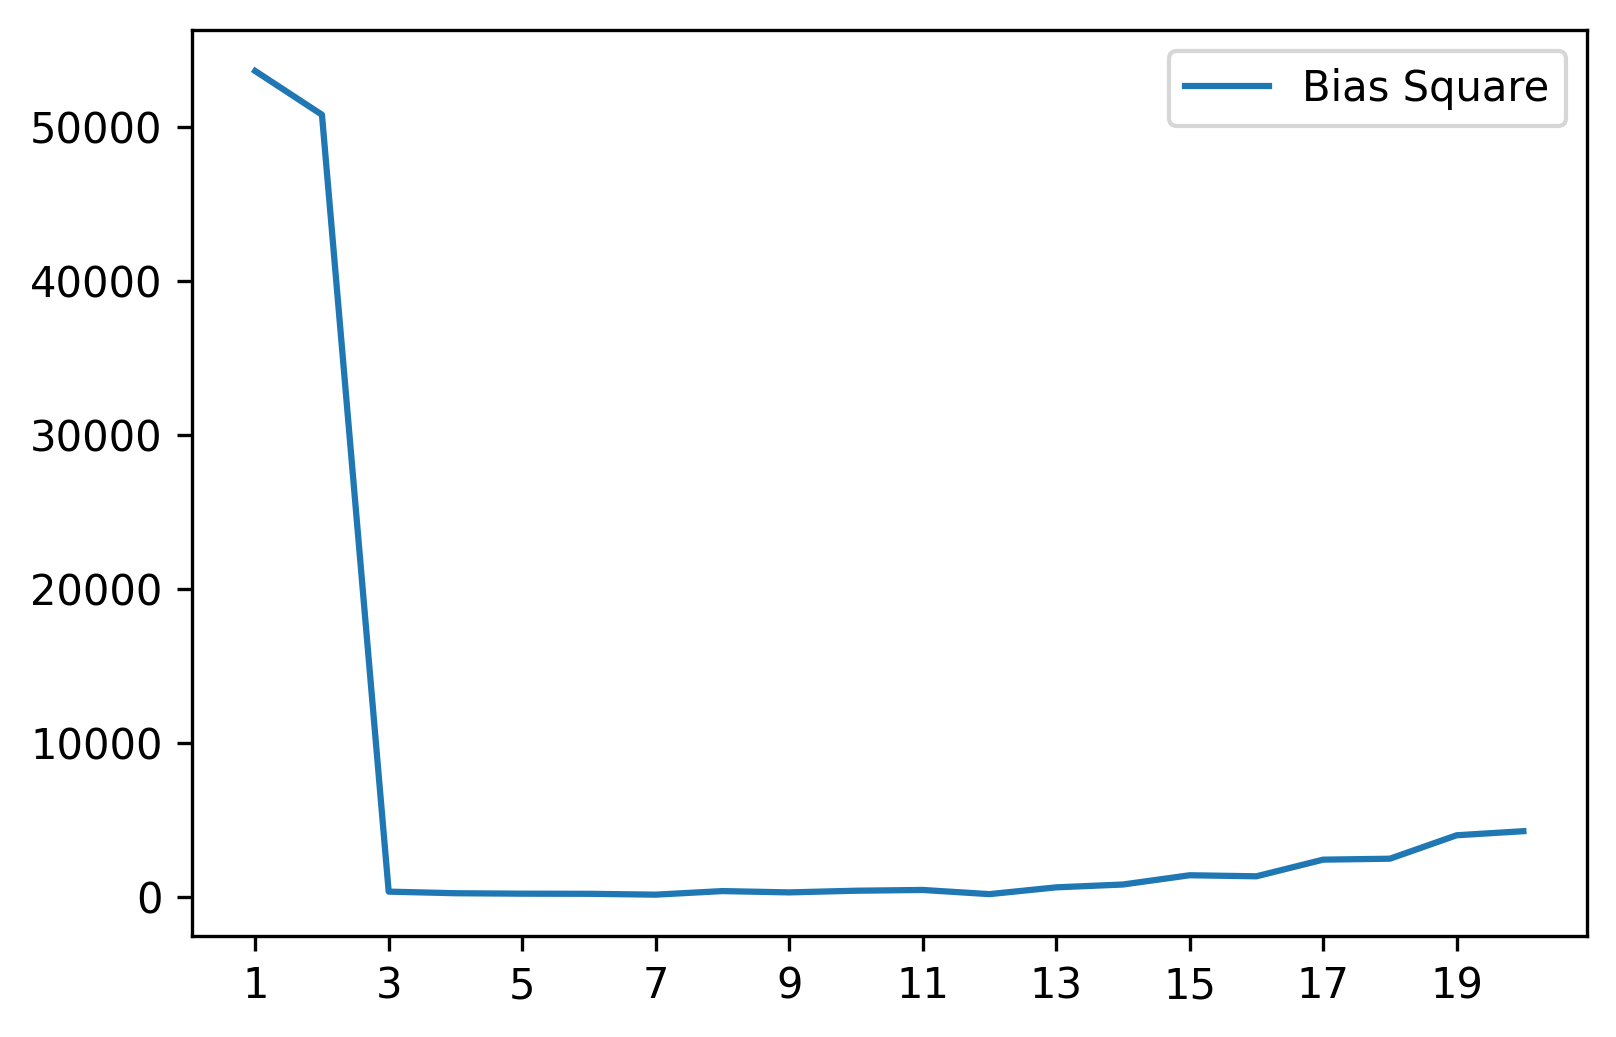

In [10]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.legend()
plt.show()

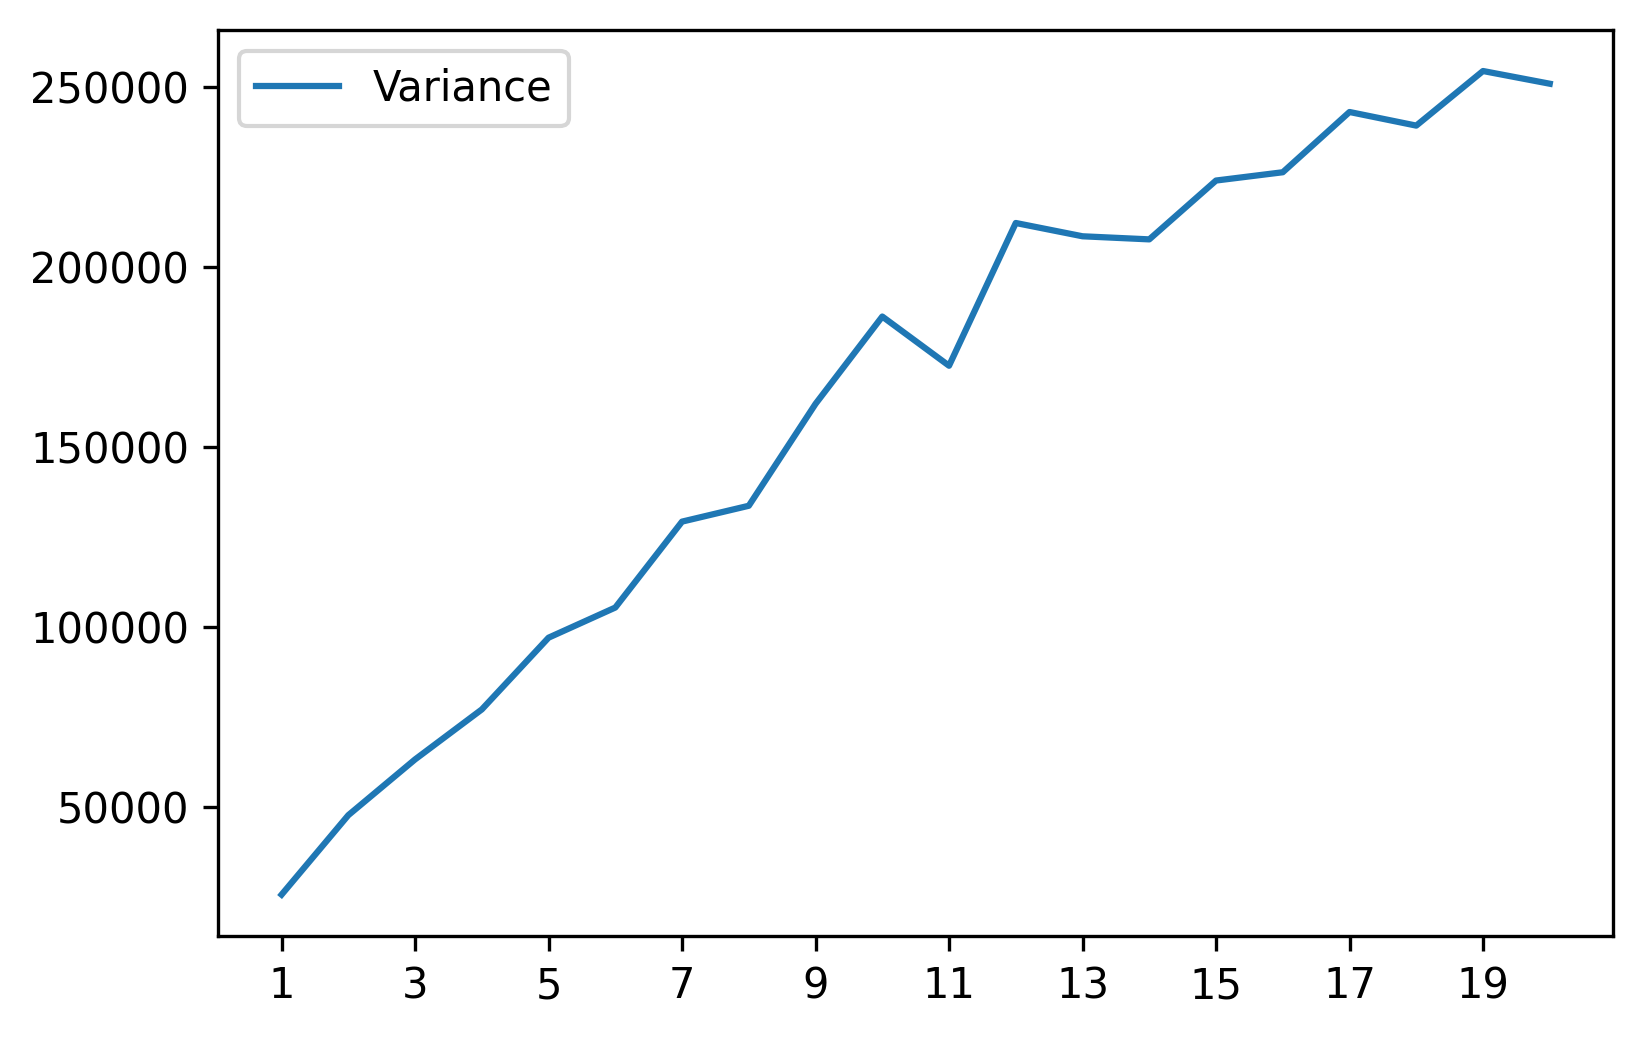

In [11]:
mpl.rcParams['figure.dpi']=300
plt.figure().patch.set_facecolor("white")
plt.xticks(np.array(range(1,21,2)))
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.legend()
plt.show()